In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of emotion categories
emotions = ["angry", "basic_tts", "calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised"]

# List of gender-intensity combinations
gender = ["female", "male"]

# List of gender-intensity combinations
intensity = ["normal", "intense"]

# List of categories including mean
categories = ["Comprehensibility", "Emotion precision", "Disturbing artifacts", "Naturalness", "General speech quality", "Category Mean"]

# Read CSV files into DataFrames
mean_df = pd.read_csv("Rate the emotional TTS quality (Antworten) - Means.csv", thousands='.', decimal=',')
std_dev_df = pd.read_csv("Rate the emotional TTS quality (Antworten) - Standard Deviation.csv", thousands='.', decimal=',')
min_df = pd.read_csv("Rate the emotional TTS quality (Antworten) - Min.csv", thousands='.', decimal=',')
max_df = pd.read_csv("Rate the emotional TTS quality (Antworten) - Max.csv", thousands='.', decimal=',')

# Combine all DataFrames into one
all_data = {"Mean": mean_df, "Std Dev": std_dev_df, "Min": min_df, "Max": max_df}
metrics = all_data.keys()

# Drop the column "Unnamed: 6" from each DataFrame
for key in all_data.keys():
    if 'Unnamed: 6' in all_data[key].columns:
        all_data[key].drop('Unnamed: 6', axis=1, inplace=True)

# Keep only rows up to and including index 30
for key in all_data.keys():
    all_data[key] = all_data[key].iloc[:31, :]

In [2]:
%matplotlib inline
#mean_df # This DataFrame contains the mean values for each category, but still spam

In [3]:
index = pd.MultiIndex.from_product([emotions, gender, intensity], names=['Emotion', 'Gender', 'Intensity'])
columns = pd.MultiIndex.from_product([categories, metrics], names=['Category', 'Metric'])

result_df = pd.DataFrame(index=index, columns=columns)

result_df.drop(index=[('basic_tts', 'female', 'normal')], inplace=True)
result_df.drop(index=[('basic_tts', 'male', 'intense')], inplace=True)
result_df.drop(index=[('basic_tts', 'female', 'intense')], inplace=True)

result_df.drop(index=[('neutral', 'female', 'intense')], inplace=True)
result_df.drop(index=[('neutral', 'male', 'intense')], inplace=True)

In [4]:
# result_df # This DataFrame is empty, but has the correct structure

In [5]:
#print(result_df.info())
#print(result_df.index)

#print(all_data["Mean"].info())
#print(all_data["Mean"].index)

#result_df.index

In [6]:
# Fill the result DataFrame with the values from the original DataFrames
for metric in metrics:
    for category in categories:
        for emotion in emotions:
            for g in gender:
                for i in intensity:
                    filename_part = "" if i == "normal" else "_strongIntensity"
                    substring_to_find = f"{emotion}{filename_part}__{g}.wav"
                    if emotion == "basic_tts":
                        substring_to_find = "basicTTS.wav"
                        if i == "intense":
                            continue
                        if g == "female":
                            continue
                    if emotion == "fearful" and i == "normal":
                        substring_to_find = f"{emotion}{filename_part}_{g}.wav"
                    filtered_rows = all_data[metric][all_data[metric]['Filename'].str.contains(substring_to_find)]
                    if not filtered_rows.empty:
                        result_df.loc[(emotion, g, i), (category, metric)] = filtered_rows[category].values[0]


In [7]:
result_df

Category                   Comprehensibility                      \
Metric                                  Mean   Std Dev  Min  Max   
Emotion   Gender Intensity                                         
angry     female normal             3.923077  1.187542  1.0  5.0   
                 intense            4.230769  0.926809  2.0  5.0   
          male   normal             4.615385   0.50637  4.0  5.0   
                 intense            4.384615  0.767948  3.0  5.0   
basic_tts male   normal             2.384615  1.502135  1.0  5.0   
calm      female normal             3.923077  1.037749  2.0  5.0   
                 intense            4.307692  1.031553  2.0  5.0   
          male   normal                  2.0       1.0  1.0  4.0   
                 intense            3.615385  1.120897  1.0  5.0   
disgust   female normal                  4.0  0.912871  2.0  5.0   
                 intense            4.076923  0.954074  2.0  5.0   
          male   normal             2.461538  0.967418  1.0  4.0   
                 intense            3.615385  1.120897  1.0  5.0   
fearful   female normal             4.461538   0.77625  3.0  5.0   
                 intense            4.307692  0.947331  2.0  5.0   
          male   normal             2.538462  1.330124  1.0  5.0   
                 intense            3.769231  1.165751  1.0  5.0   
happy     female normal             4.307692  0.947331  2.0  5.0   
                 intense            4.076923  1.115164  1.0  5.0   
          male   normal             1.692308    1.1094  0.0  4.0   
                 intense            4.307692  0.947331  2.0  5.0   
neutral   female normal             4.615385   0.50637  4.0  5.0   
          male   normal             2.153846  1.068188  0.0  4.0   
sad       female normal             4.153846  0.987096  2.0  5.0   
                 intense            4.615385  0.767948  3.0  5.0   
          male   normal             4.461538   0.77625  3.0  5.0   
                 intense            4.230769  1.165751  2.0  5.0   
surprised female normal             4.153846  1.068188  2.0  5.0   
                 intense            2.538462  1.265924  0.0  5.0   
          male   normal             4.230769  1.012739  2.0  5.0   
                 intense            4.153846  0.987096  2.0  5.0   

Category                   Emotion precision                      \
Metric                                  Mean   Std Dev  Min  Max   
Emotion   Gender Intensity                                         
angry     female normal             1.538462  1.506397  0.0  4.0   
                 intense            4.230769  0.599145  3.0  5.0   
          male   normal             3.538462  1.198289  1.0  5.0   
                 intense            4.076923  0.954074  2.0  5.0   
basic_tts male   normal             1.153846  1.214232  0.0  3.0   
calm      female normal             2.384615   1.38675  0.0  5.0   
                 intense            3.307692  1.493576  0.0  5.0   
          male   normal             1.384615   1.38675  0.0  5.0   
                 intense            1.769231  1.235168  0.0  4.0   
disgust   female normal             3.307692  1.493576  0.0  5.0   
                 intense            1.615385  1.325296  0.0  4.0   
          male   normal             0.846154  0.987096  0.0  3.0   
                 intense            2.615385  1.660244  0.0  5.0   
fearful   female normal             3.769231  1.786703  0.0  5.0   
                 intense                 4.0       1.0  2.0  5.0   
          male   normal             1.846154  1.463224  0.0  4.0   
                 intense            2.307692  1.652504  0.0  5.0   
happy     female normal             1.461538  1.391365  0.0  5.0   
                 intense            1.461538  1.450022  0.0  4.0   
          male   normal             0.923077  0.954074  0.0  3.0   
                 intense            1.307692  1.315587  0.0  4.0   
neutral   female normal             3.692308  1.377474 

In [8]:
# sns.catplot(data=result_df, kind="box", orient="h") # too broad

In [9]:
#result_df["Category Mean"]

In [10]:
mean_df = result_df.loc[:, result_df.columns.get_level_values(1) == 'Mean']
std_df = result_df.loc[:, result_df.columns.get_level_values(1) == 'Std Dev']
min_df = result_df.loc[:, result_df.columns.get_level_values(1) == 'Min']
max_df = result_df.loc[:, result_df.columns.get_level_values(1) == 'Max']
#std_df
#min_df
#max_df
mean_df

Category                   Comprehensibility Emotion precision  \
Metric                                  Mean              Mean   
Emotion   Gender Intensity                                       
angry     female normal             3.923077          1.538462   
                 intense            4.230769          4.230769   
          male   normal             4.615385          3.538462   
                 intense            4.384615          4.076923   
basic_tts male   normal             2.384615          1.153846   
calm      female normal             3.923077          2.384615   
                 intense            4.307692          3.307692   
          male   normal                  2.0          1.384615   
                 intense            3.615385          1.769231   
disgust   female normal                  4.0          3.307692   
                 intense            4.076923          1.615385   
          male   normal             2.461538          0.846154   
                 intense            3.615385          2.615385   
fearful   female normal             4.461538          3.769231   
                 intense            4.307692               4.0   
          male   normal             2.538462          1.846154   
                 intense            3.769231          2.307692   
happy     female normal             4.307692          1.461538   
                 intense            4.076923          1.461538   
          male   normal             1.692308          0.923077   
                 intense            4.307692          1.307692   
neutral   female normal             4.615385          3.692308   
          male   normal             2.153846          1.923077   
sad       female normal             4.153846          4.384615   
                 intense            4.615385          3.307692   
          male   normal             4.461538          2.846154   
                 intense            4.230769          4.153846   
surprised female normal             4.153846          3.307692   
                 intense            2.538462          3.230769   
          male   normal             4.230769          2.692308   
                 intense            4.153846          3.307692   

Category                   Disturbing artifacts Naturalness  \
Metric                                     Mean        Mean   
Emotion   Gender Intensity                                    
angry     female normal                3.923077    2.615385   
                 intense               2.846154    3.384615   
          male   normal                4.076923    3.615385   
                 intense               3.153846         4.0   
basic_tts male   normal                1.461538    0.153846   
calm      female normal                3.538462    2.692308   
                 intense               4.076923    3.692308   
          male   normal                1.153846    1.230769   
                 intense               2.461538    1.692308   
disgust   female normal                3.769231    3.615385   
                 intense               4.076923    3.384615   
          male   normal                1.076923    1.230769   
                 intense                    3.0    2.692308   
fearful   female normal                4.461538    4.230769   
                 intense               3.692308         4.0   
          male   normal                1.846154    1.538462   
                 intense               3.538462    2.230769   
happy     female normal                4.153846    2.923077   
                 intense               3.769231         3.0   
          male   normal                1.153846    1.615385   
                 intense               3.615385    2.230769   
neutral   female normal                4.692308    3.846154   
          male   normal                0.692308    1.538462   
sad       female normal                3.846154    4.076923   
                 intense               4.615385       

In [11]:
# Combine the DataFrames into a single DataFrame
combined_df = pd.concat([mean_df, std_df, min_df, max_df], keys=['Mean', 'Std Dev', 'Min', 'Max'], axis=1)
combined_df


Mean                    \
Category                   Comprehensibility Emotion precision   
Metric                                  Mean              Mean   
Emotion   Gender Intensity                                       
angry     female normal             3.923077          1.538462   
                 intense            4.230769          4.230769   
          male   normal             4.615385          3.538462   
                 intense            4.384615          4.076923   
basic_tts male   normal             2.384615          1.153846   
calm      female normal             3.923077          2.384615   
                 intense            4.307692          3.307692   
          male   normal                  2.0          1.384615   
                 intense            3.615385          1.769231   
disgust   female normal                  4.0          3.307692   
                 intense            4.076923          1.615385   
          male   normal             2.461538          0.846154   
                 intense            3.615385          2.615385   
fearful   female normal             4.461538          3.769231   
                 intense            4.307692               4.0   
          male   normal             2.538462          1.846154   
                 intense            3.769231          2.307692   
happy     female normal             4.307692          1.461538   
                 intense            4.076923          1.461538   
          male   normal             1.692308          0.923077   
                 intense            4.307692          1.307692   
neutral   female normal             4.615385          3.692308   
          male   normal             2.153846          1.923077   
sad       female normal             4.153846          4.384615   
                 intense            4.615385          3.307692   
          male   normal             4.461538          2.846154   
                 intense            4.230769          4.153846   
surprised female normal             4.153846          3.307692   
                 intense            2.538462          3.230769   
          male   normal             4.230769          2.692308   
                 intense            4.153846          3.307692   

                                                             \
Category                   Disturbing artifacts Naturalness   
Metric                                     Mean        Mean   
Emotion   Gender Intensity                                    
angry     female normal                3.923077    2.615385   
                 intense               2.846154    3.384615   
          male   normal                4.076923    3.615385   
                 intense               3.153846         4.0   
basic_tts male   normal                1.461538    0.153846   
calm      female normal                3.538462    2.692308   
                 intense               4.076923    3.692308   
          male   normal                1.153846    1.230769   
                 intense               2.461538    1.692308   
disgust   female normal                3.769231    3.615385   
                 intense               4.076923    3.384615   
          male   normal                1.076923    1.230769   
                 intense                    3.0    2.692308   
fearful   female normal                4.461538    4.230769   
                 intense               3.692308         4.0   
          male   normal                1.846154    1.538462   
                 intense               3.538462    2.230769   
happy     female normal                4.153846    2.923077   
                 intense               3.769231         3.0   
          male   normal                1.153846    1.615385   
                 intense               3.615385    2.230769   
neutral   female normal                4.692308    3.846154   
          male   normal                0.692308    1.538462   
sad       female normal     

In [12]:

#sns.clustermap(mean_df, cmap="mako", vmin=0, vmax=5)
mean_df
#sns.heatmap(mean_df, cmap="crest")

Category                   Comprehensibility Emotion precision  \
Metric                                  Mean              Mean   
Emotion   Gender Intensity                                       
angry     female normal             3.923077          1.538462   
                 intense            4.230769          4.230769   
          male   normal             4.615385          3.538462   
                 intense            4.384615          4.076923   
basic_tts male   normal             2.384615          1.153846   
calm      female normal             3.923077          2.384615   
                 intense            4.307692          3.307692   
          male   normal                  2.0          1.384615   
                 intense            3.615385          1.769231   
disgust   female normal                  4.0          3.307692   
                 intense            4.076923          1.615385   
          male   normal             2.461538          0.846154   
                 intense            3.615385          2.615385   
fearful   female normal             4.461538          3.769231   
                 intense            4.307692               4.0   
          male   normal             2.538462          1.846154   
                 intense            3.769231          2.307692   
happy     female normal             4.307692          1.461538   
                 intense            4.076923          1.461538   
          male   normal             1.692308          0.923077   
                 intense            4.307692          1.307692   
neutral   female normal             4.615385          3.692308   
          male   normal             2.153846          1.923077   
sad       female normal             4.153846          4.384615   
                 intense            4.615385          3.307692   
          male   normal             4.461538          2.846154   
                 intense            4.230769          4.153846   
surprised female normal             4.153846          3.307692   
                 intense            2.538462          3.230769   
          male   normal             4.230769          2.692308   
                 intense            4.153846          3.307692   

Category                   Disturbing artifacts Naturalness  \
Metric                                     Mean        Mean   
Emotion   Gender Intensity                                    
angry     female normal                3.923077    2.615385   
                 intense               2.846154    3.384615   
          male   normal                4.076923    3.615385   
                 intense               3.153846         4.0   
basic_tts male   normal                1.461538    0.153846   
calm      female normal                3.538462    2.692308   
                 intense               4.076923    3.692308   
          male   normal                1.153846    1.230769   
                 intense               2.461538    1.692308   
disgust   female normal                3.769231    3.615385   
                 intense               4.076923    3.384615   
          male   normal                1.076923    1.230769   
                 intense                    3.0    2.692308   
fearful   female normal                4.461538    4.230769   
                 intense               3.692308         4.0   
          male   normal                1.846154    1.538462   
                 intense               3.538462    2.230769   
happy     female normal                4.153846    2.923077   
                 intense               3.769231         3.0   
          male   normal                1.153846    1.615385   
                 intense               3.615385    2.230769   
neutral   female normal                4.692308    3.846154   
          male   normal                0.692308    1.538462   
sad       female normal                3.846154    4.076923   
                 intense               4.615385       

In [13]:

# Specify the order of categories for better plotting
# order = ["angry", "basic_tts", "calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised"]
order = ["fearful", "neutral", "sad", "angry", "calm", "surprised", "disgust", "basic_tts"]

In [14]:
sns.set_theme(style="darkgrid")
sns.set_style("dark")

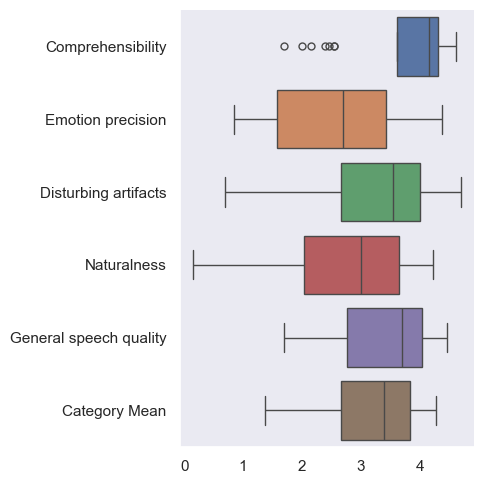

In [15]:
sns.catplot(data=combined_df['Mean'], kind="box", orient="h")

In [16]:
combined_df.index
combined_df.index.transpose()
combined_df.columns

#result_df
print(result_df.columns)
print(result_df.index)

MultiIndex([(     'Comprehensibility',    'Mean'),
            (     'Comprehensibility', 'Std Dev'),
            (     'Comprehensibility',     'Min'),
            (     'Comprehensibility',     'Max'),
            (     'Emotion precision',    'Mean'),
            (     'Emotion precision', 'Std Dev'),
            (     'Emotion precision',     'Min'),
            (     'Emotion precision',     'Max'),
            (  'Disturbing artifacts',    'Mean'),
            (  'Disturbing artifacts', 'Std Dev'),
            (  'Disturbing artifacts',     'Min'),
            (  'Disturbing artifacts',     'Max'),
            (           'Naturalness',    'Mean'),
            (           'Naturalness', 'Std Dev'),
            (           'Naturalness',     'Min'),
            (           'Naturalness',     'Max'),
            ('General speech quality',    'Mean'),
            ('General speech quality', 'Std Dev'),
            ('General speech quality',     'Min'),
            ('General speech qu

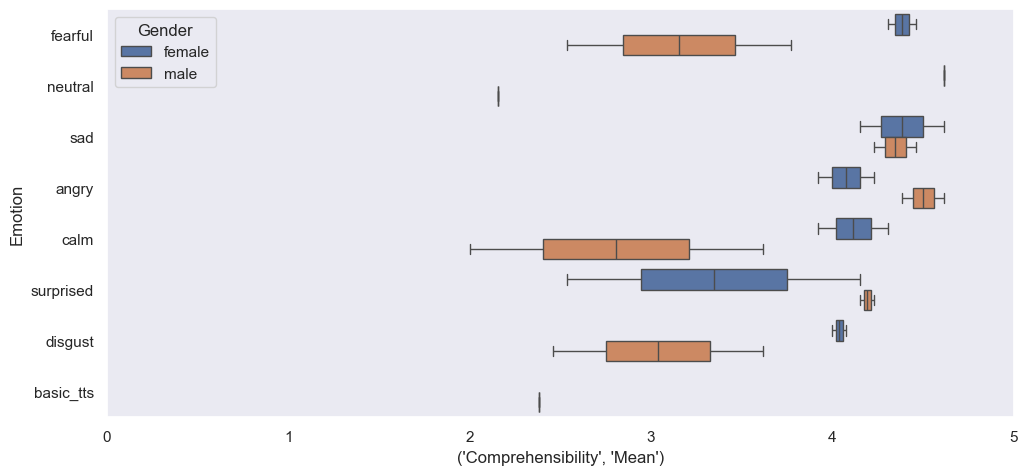

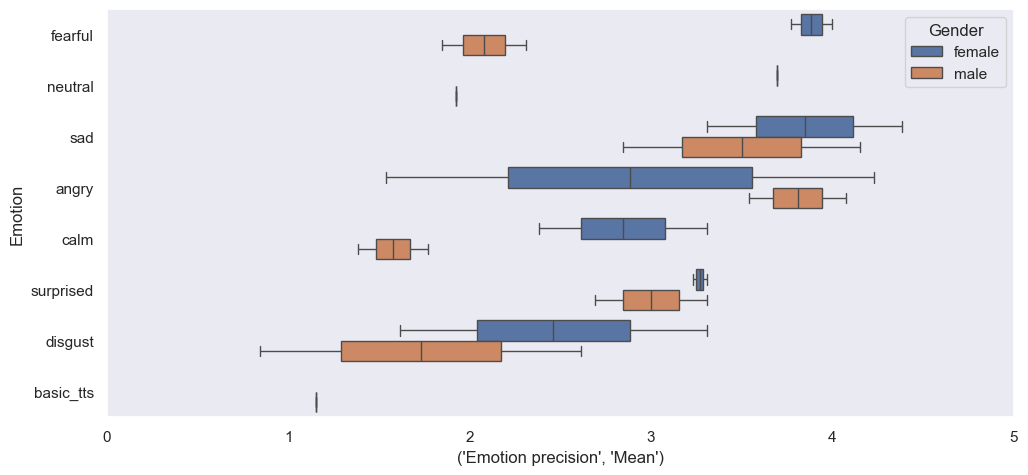

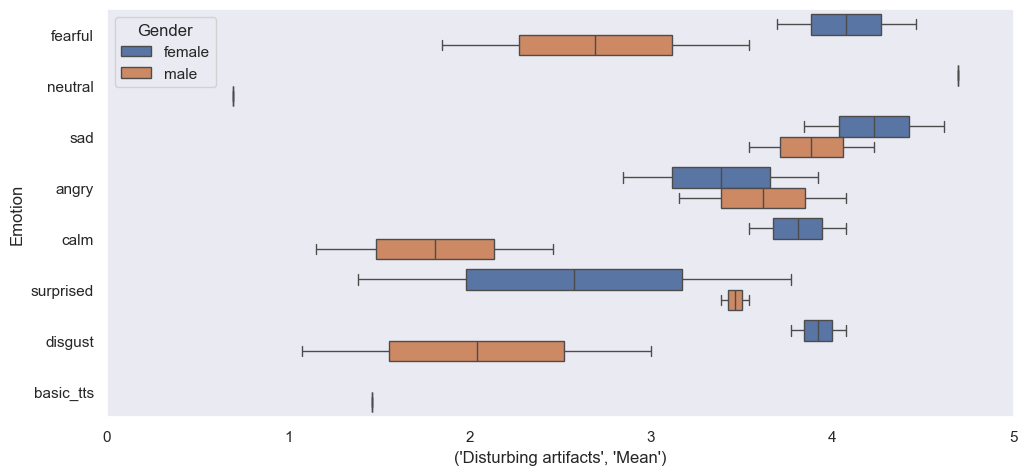

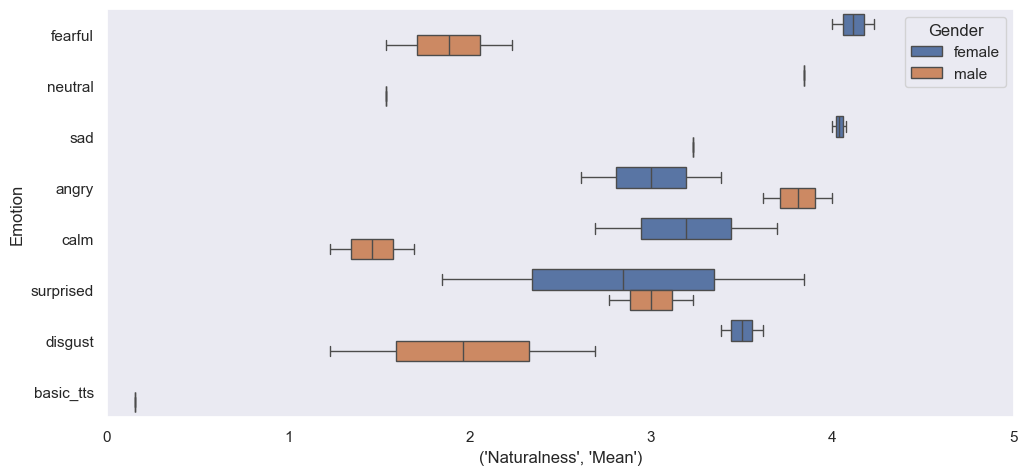

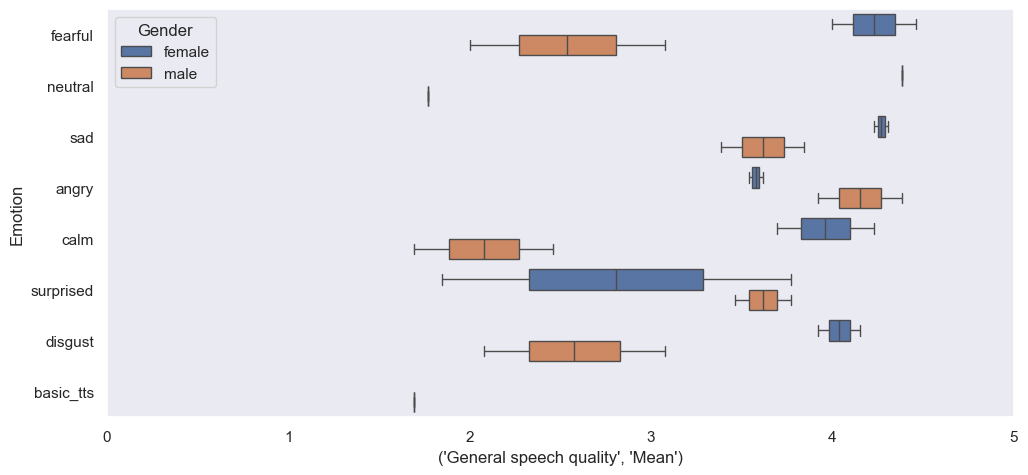

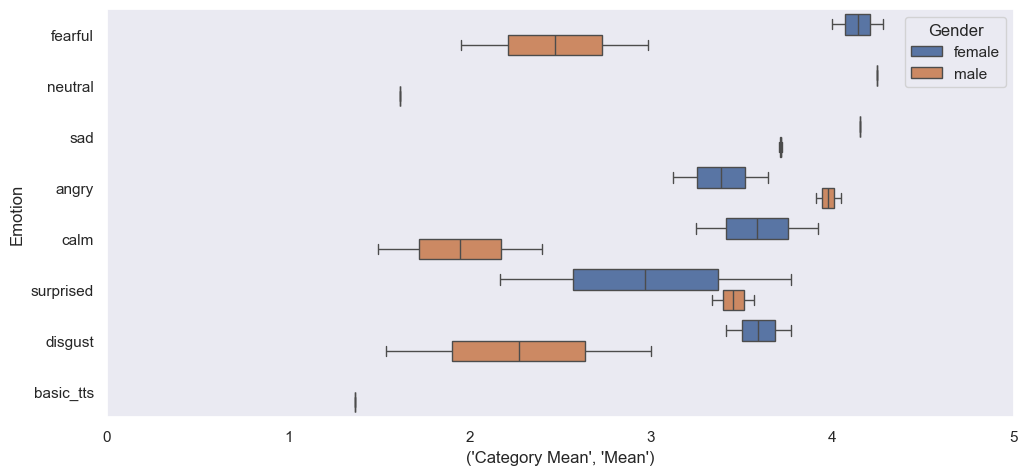

In [17]:
result_df_reset = result_df.reset_index()

plt.figure(figsize=(11.7, 5.3))
sns.boxplot(x=result_df_reset[('Comprehensibility', 'Mean')], y=result_df_reset['Emotion'], hue=result_df_reset['Gender'], order=order, orient='h')
plt.xlim(0, 5)
plt.show()
plt.figure(figsize=(11.7, 5.3))
sns.boxplot(x=result_df_reset[('Emotion precision', 'Mean')], y=result_df_reset['Emotion'], hue=result_df_reset['Gender'], order=order, orient='h')
plt.xlim(0, 5)
plt.show()
plt.figure(figsize=(11.7, 5.3))
sns.boxplot(x=result_df_reset[('Disturbing artifacts', 'Mean')], y=result_df_reset['Emotion'], hue=result_df_reset['Gender'], order=order, orient='h')
plt.xlim(0, 5)
plt.show()
plt.figure(figsize=(11.7, 5.3))
sns.boxplot(x=result_df_reset[('Naturalness', 'Mean')], y=result_df_reset['Emotion'], hue=result_df_reset['Gender'], order=order, orient='h')
plt.xlim(0, 5)
plt.show()
plt.figure(figsize=(11.7, 5.3))
sns.boxplot(x=result_df_reset[('General speech quality', 'Mean')], y=result_df_reset['Emotion'], hue=result_df_reset['Gender'], order=order, orient='h')
plt.xlim(0, 5)
plt.show()
plt.figure(figsize=(11.7, 5.3))
sns.boxplot(x=result_df_reset[('Category Mean', 'Mean')], y=result_df_reset['Emotion'], hue=result_df_reset['Gender'], order=order, orient='h')
plt.xlim(0, 5)
plt.show()

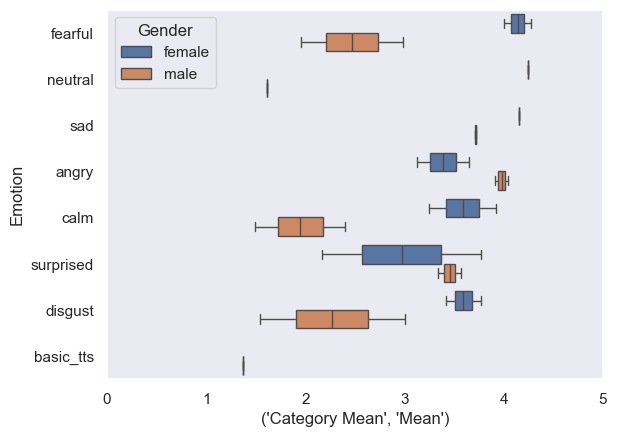

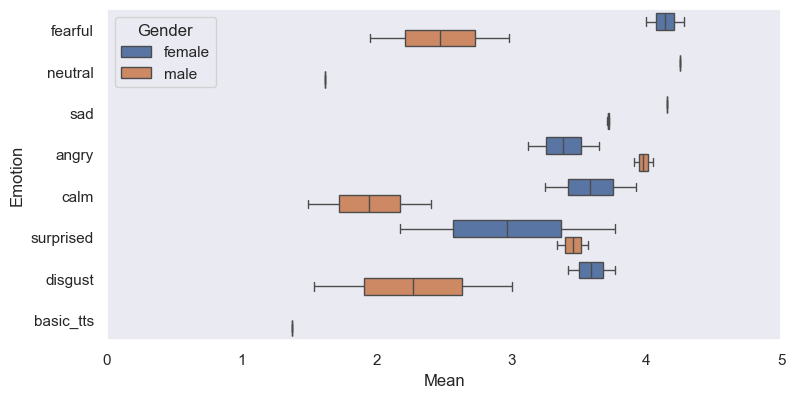

In [18]:
sns.boxplot(x=result_df_reset[('Category Mean', 'Mean')], y=result_df_reset['Emotion'], hue=result_df_reset['Gender'], order=order, orient='h')
plt.xlim(0, 5)
plt.show()

plt.figure(figsize=(8.7, 4.3))
sns.boxplot(x=result_df_reset[('Category Mean', 'Mean')], y=result_df_reset['Emotion'], hue=result_df_reset['Gender'], order=order, orient='h')
plt.xlim(0, 5)
plt.xlabel('Mean')
plt.show()

Axes(0.125,0.653529;0.352273x0.226471)
Axes(0.547727,0.653529;0.352273x0.226471)
Axes(0.125,0.381765;0.352273x0.226471)
Axes(0.547727,0.381765;0.352273x0.226471)
Axes(0.125,0.11;0.352273x0.226471)
Axes(0.547727,0.11;0.352273x0.226471)


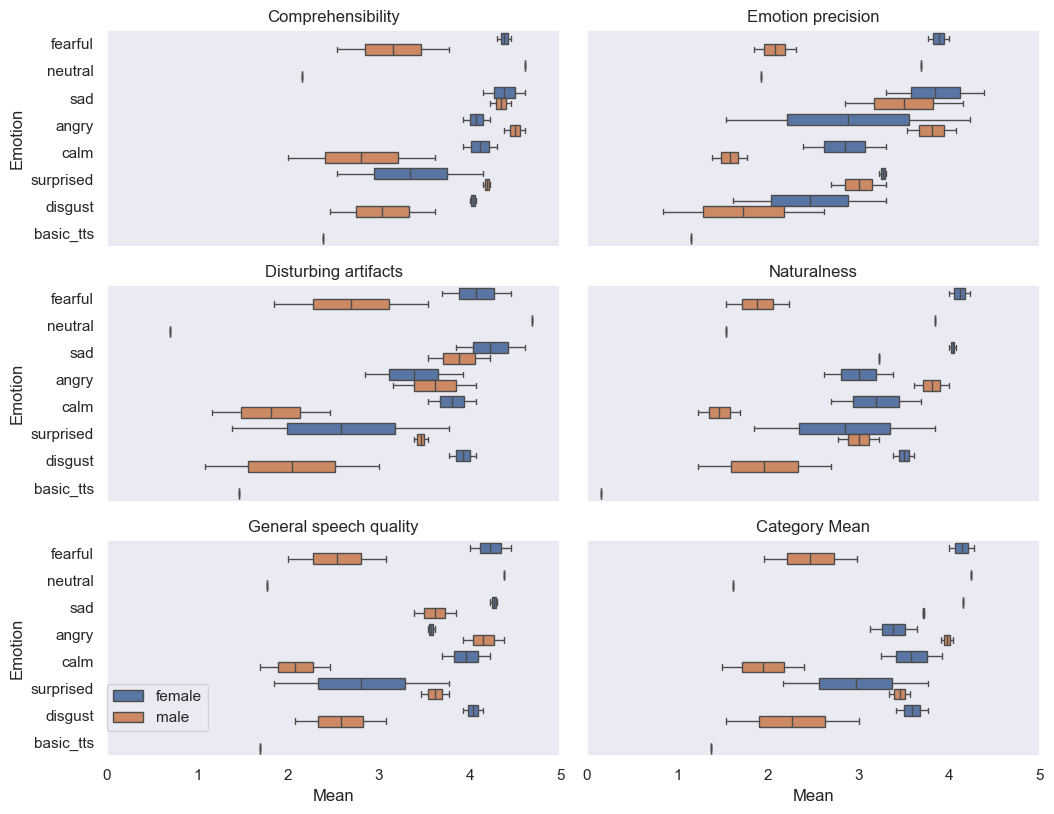

In [19]:
fig, axs = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(10.7, 8.3))

sns.boxplot(x=result_df_reset[('Comprehensibility', 'Mean')], y=result_df_reset['Emotion'], hue=result_df_reset['Gender'], order=order, orient='h', ax=axs[0,0])
sns.boxplot(x=result_df_reset[('Emotion precision', 'Mean')], y=result_df_reset['Emotion'], hue=result_df_reset['Gender'], order=order, orient='h', ax=axs[0,1], legend=False)
sns.boxplot(x=result_df_reset[('Disturbing artifacts', 'Mean')], y=result_df_reset['Emotion'], hue=result_df_reset['Gender'], order=order, orient='h', ax=axs[1,0], legend=False)
sns.boxplot(x=result_df_reset[('Naturalness', 'Mean')], y=result_df_reset['Emotion'], hue=result_df_reset['Gender'], order=order, orient='h', ax=axs[1,1], legend=False)
sns.boxplot(x=result_df_reset[('General speech quality', 'Mean')], y=result_df_reset['Emotion'], hue=result_df_reset['Gender'], order=order, orient='h', ax=axs[2,0], legend=False)
sns.boxplot(x=result_df_reset[('Category Mean', 'Mean')], y=result_df_reset['Emotion'], hue=result_df_reset['Gender'], order=order, orient='h', ax=axs[2,1], legend=False)
axs[0,0].set_xlim(0, 5)
axs[0,1].set_xlim(0, 5)

descriptions = categories

for i, ax in enumerate(axs.flat):
    print(ax)
    ax.set_title(descriptions[i])
    if ax.get_legend() is not None:
        ax.get_legend().remove()
    ax.set_xlabel('Mean')

# Create a shared legend outside of the figure
fig.legend(loc='lower left', bbox_to_anchor=(0.1, 0.1))

plt.tight_layout()
plt.show()

In [20]:
#result_df["Category Mean"]["Mean"].unstack(level=1).unstack(level=1).plot(kind="bar", figsize=(15, 10), title="Mean ratings for each emotion", ylabel="Mean rating", xlabel="Emotion", legend=True, rot=0)
#mean_df
combined_df.keys

<bound method NDFrame.keys of                                         Mean                    \
Category                   Comprehensibility Emotion precision   
Metric                                  Mean              Mean   
Emotion   Gender Intensity                                       
angry     female normal             3.923077          1.538462   
                 intense            4.230769          4.230769   
          male   normal             4.615385          3.538462   
                 intense            4.384615          4.076923   
basic_tts male   normal             2.384615          1.153846   
calm      female normal             3.923077          2.384615   
                 intense            4.307692          3.307692   
          male   normal                  2.0          1.384615   
                 intense            3.615385          1.769231   
disgust   female normal                  4.0          3.307692   
                 intense            4.076923  

In [21]:
basic_tts = result_df["Category Mean"]["Mean"]["basic_tts"]
basic_tts

Gender  Intensity
male    normal       1.369231
Name: Mean, dtype: object

In [22]:
order

['fearful',
 'neutral',
 'sad',
 'angry',
 'calm',
 'surprised',
 'disgust',
 'basic_tts']

<Axes: title={'center': 'Mean ratings for each emotion'}, xlabel='Emotion', ylabel='Mean rating'>

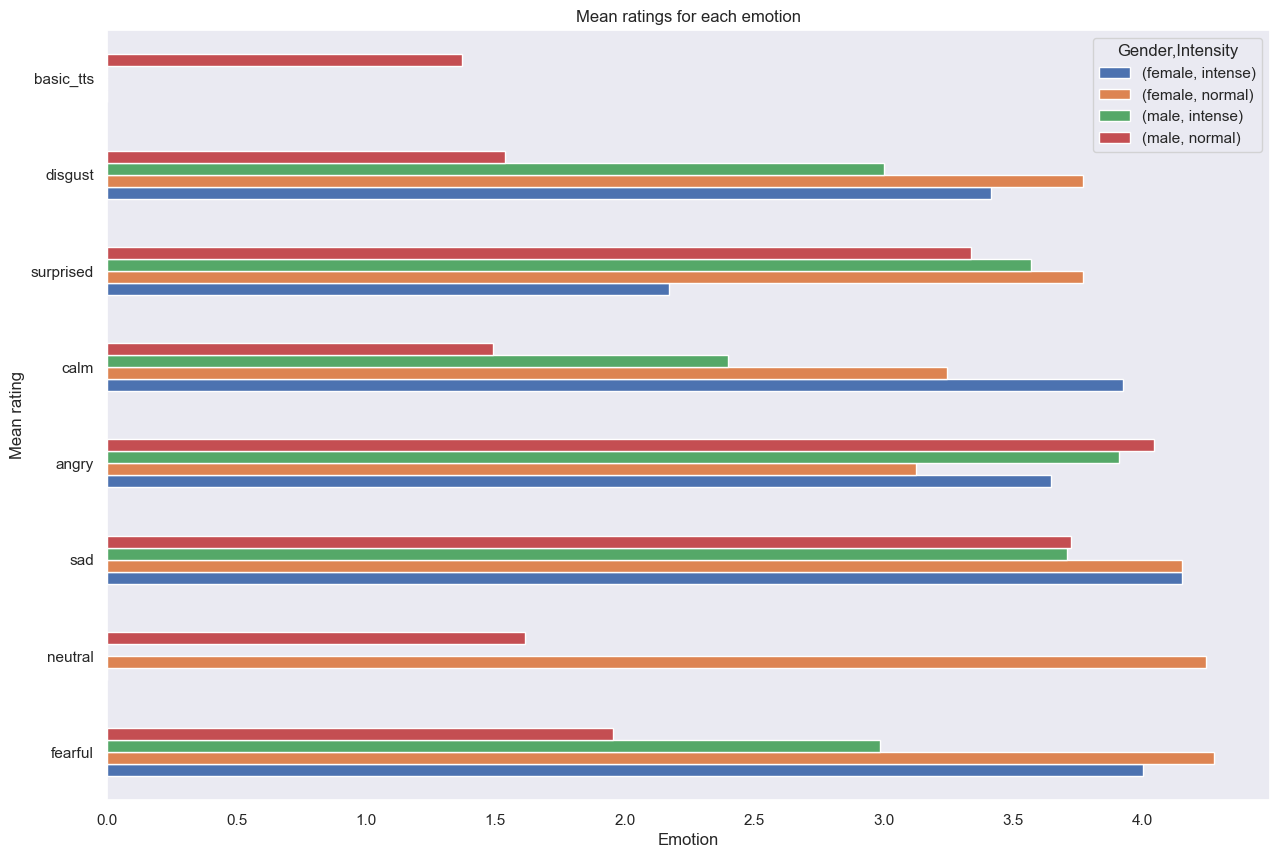

In [23]:

category_mean_to_plot = result_df["Category Mean"]["Mean"].unstack(level=1).unstack(level=1).reindex(order)
category_mean_err_to_plot = result_df["Category Mean"]["Std Dev"].unstack(level=1).unstack(level=1).reindex(order)

category_mean_to_plot.plot.barh(figsize=(15, 10), 
                       title="Mean ratings for each emotion", 
                       ylabel="Mean rating", 
                       xlabel="Emotion", 
                       legend=True)


In [24]:
category_mean_to_plot.columns
category_mean_to_plot.index

Index(['fearful', 'neutral', 'sad', 'angry', 'calm', 'surprised', 'disgust',
       'basic_tts'],
      dtype='object', name='Emotion')

<Axes: title={'center': 'Mean ratings for each emotion'}, xlabel='Emotion', ylabel='Mean rating'>

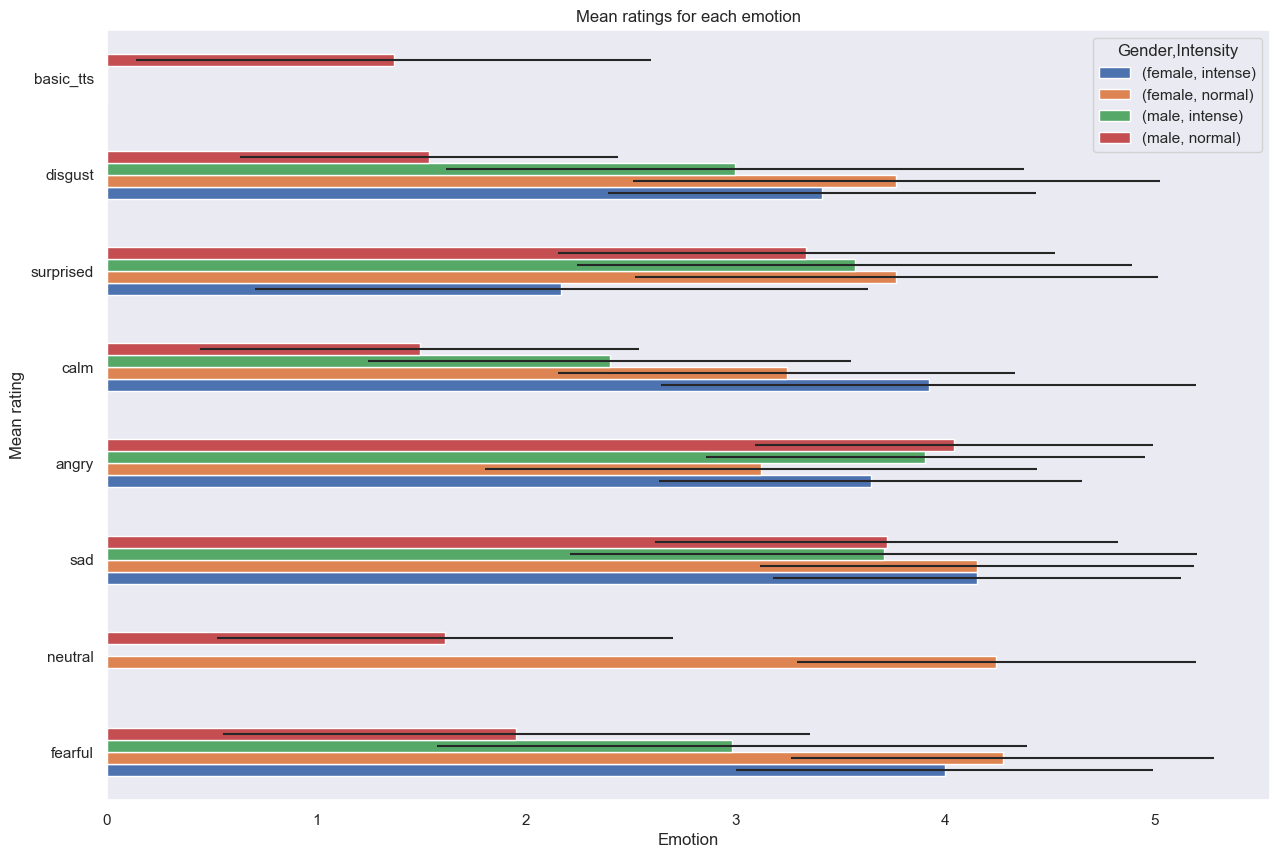

In [25]:
category_mean_to_plot.plot.barh(figsize=(15, 10), 
                       title="Mean ratings for each emotion", 
                       ylabel="Mean rating", 
                       xlabel="Emotion", 
                       xerr=category_mean_err_to_plot,
                       #colormap="Blues",
                       legend=True)

In [26]:
print(result_df.columns.names)
print(result_df.columns.levels)

['Category', 'Metric']
[['Category Mean', 'Comprehensibility', 'Disturbing artifacts', 'Emotion precision', 'General speech quality', 'Naturalness'], ['Max', 'Mean', 'Min', 'Std Dev']]


In [27]:
mean_df = result_df.xs('Mean', level='Metric', axis=1).transpose()
mean_df

Emotion                    angry                               basic_tts  \
Gender                    female                male                male   
Intensity                 normal   intense    normal   intense    normal   
Category                                                                   
Comprehensibility       3.923077  4.230769  4.615385  4.384615  2.384615   
Emotion precision       1.538462  4.230769  3.538462  4.076923  1.153846   
Disturbing artifacts    3.923077  2.846154  4.076923  3.153846  1.461538   
Naturalness             2.615385  3.384615  3.615385       4.0  0.153846   
General speech quality  3.615385  3.538462  4.384615  3.923077  1.692308   
Category Mean           3.123077  3.646154  4.046154  3.907692  1.369231   

Emotion                     calm                                 disgust  ...  \
Gender                    female                male              female  ...   
Intensity                 normal   intense    normal   intense    normal  ...   
Category                                                                  ...   
Comprehensibility       3.923077  4.307692       2.0  3.615385       4.0  ...   
Emotion precision       2.384615  3.307692  1.384615  1.769231  3.307692  ...   
Disturbing artifacts    3.538462  4.076923  1.153846  2.461538  3.769231  ...   
Naturalness             2.692308  3.692308  1.230769  1.692308  3.615385  ...   
General speech quality  3.692308  4.230769  1.692308  2.461538  4.153846  ...   
Category Mean           3.246154  3.923077  1.492308       2.4  3.769231  ...   

Emotion                  neutral                 sad                      \
Gender                    female      male    female                male   
Intensity                 normal    normal    normal   intense    normal   
Category                                                                   
Comprehensibility       4.615385  2.153846  4.153846  4.615385  4.461538   
Emotion precision       3.692308  1.923077  4.384615  3.307692  2.846154   
Disturbing artifacts    4.692308  0.692308  3.846154  4.615385  4.230769   
Naturalness             3.846154  1.538462  4.076923       4.0  3.230769   
General speech quality  4.384615  1.769231  4.307692  4.230769  3.846154   
Category Mean           4.246154  1.615385  4.153846  4.153846  3.723077   

Emotion                          surprised                                
Gender                              female                male            
Intensity                intense    normal   intense    normal   intense  
Category                                                                  
Comprehensibility       4.230769  4.153846  2.538462  4.230769  4.153846  
Emotion precision       4.153846  3.307692  3.230769  2.692308  3.307692  
Disturbing artifacts    3.538462  3.769231  1.384615  3.538462  3.384615  
Naturalness             3.230769  3.846154  1.846154  2.769231  3.230769  
General speech quality  3.384615  3.769231  1.846154  3.461538  3.769231  
Category Mean           3.707692  3.769231  2.169231  3.338462  3.569231  

[6 rows x 31 columns]

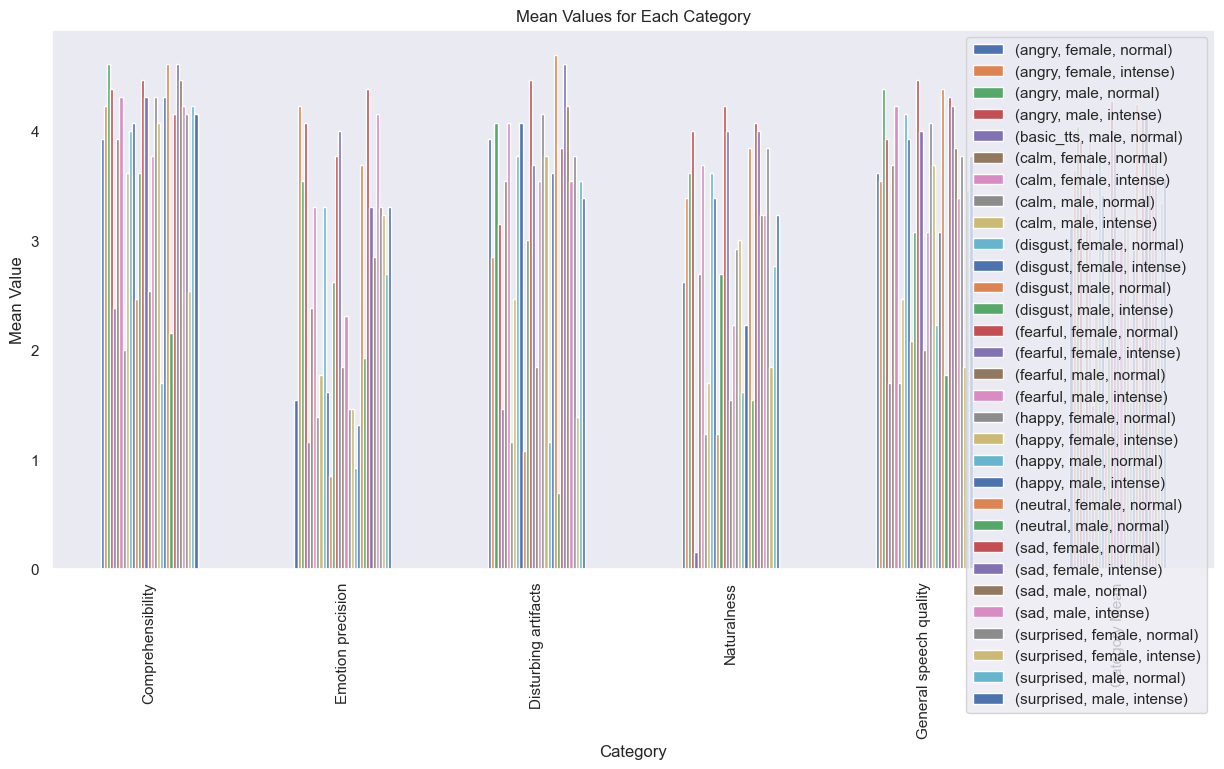

In [28]:
mean_df.plot(kind='bar', figsize=(15, 7))
plt.title('Mean Values for Each Category')
plt.ylabel('Mean Value')
plt.xlabel('Category')
plt.legend(loc='best')
plt.show()

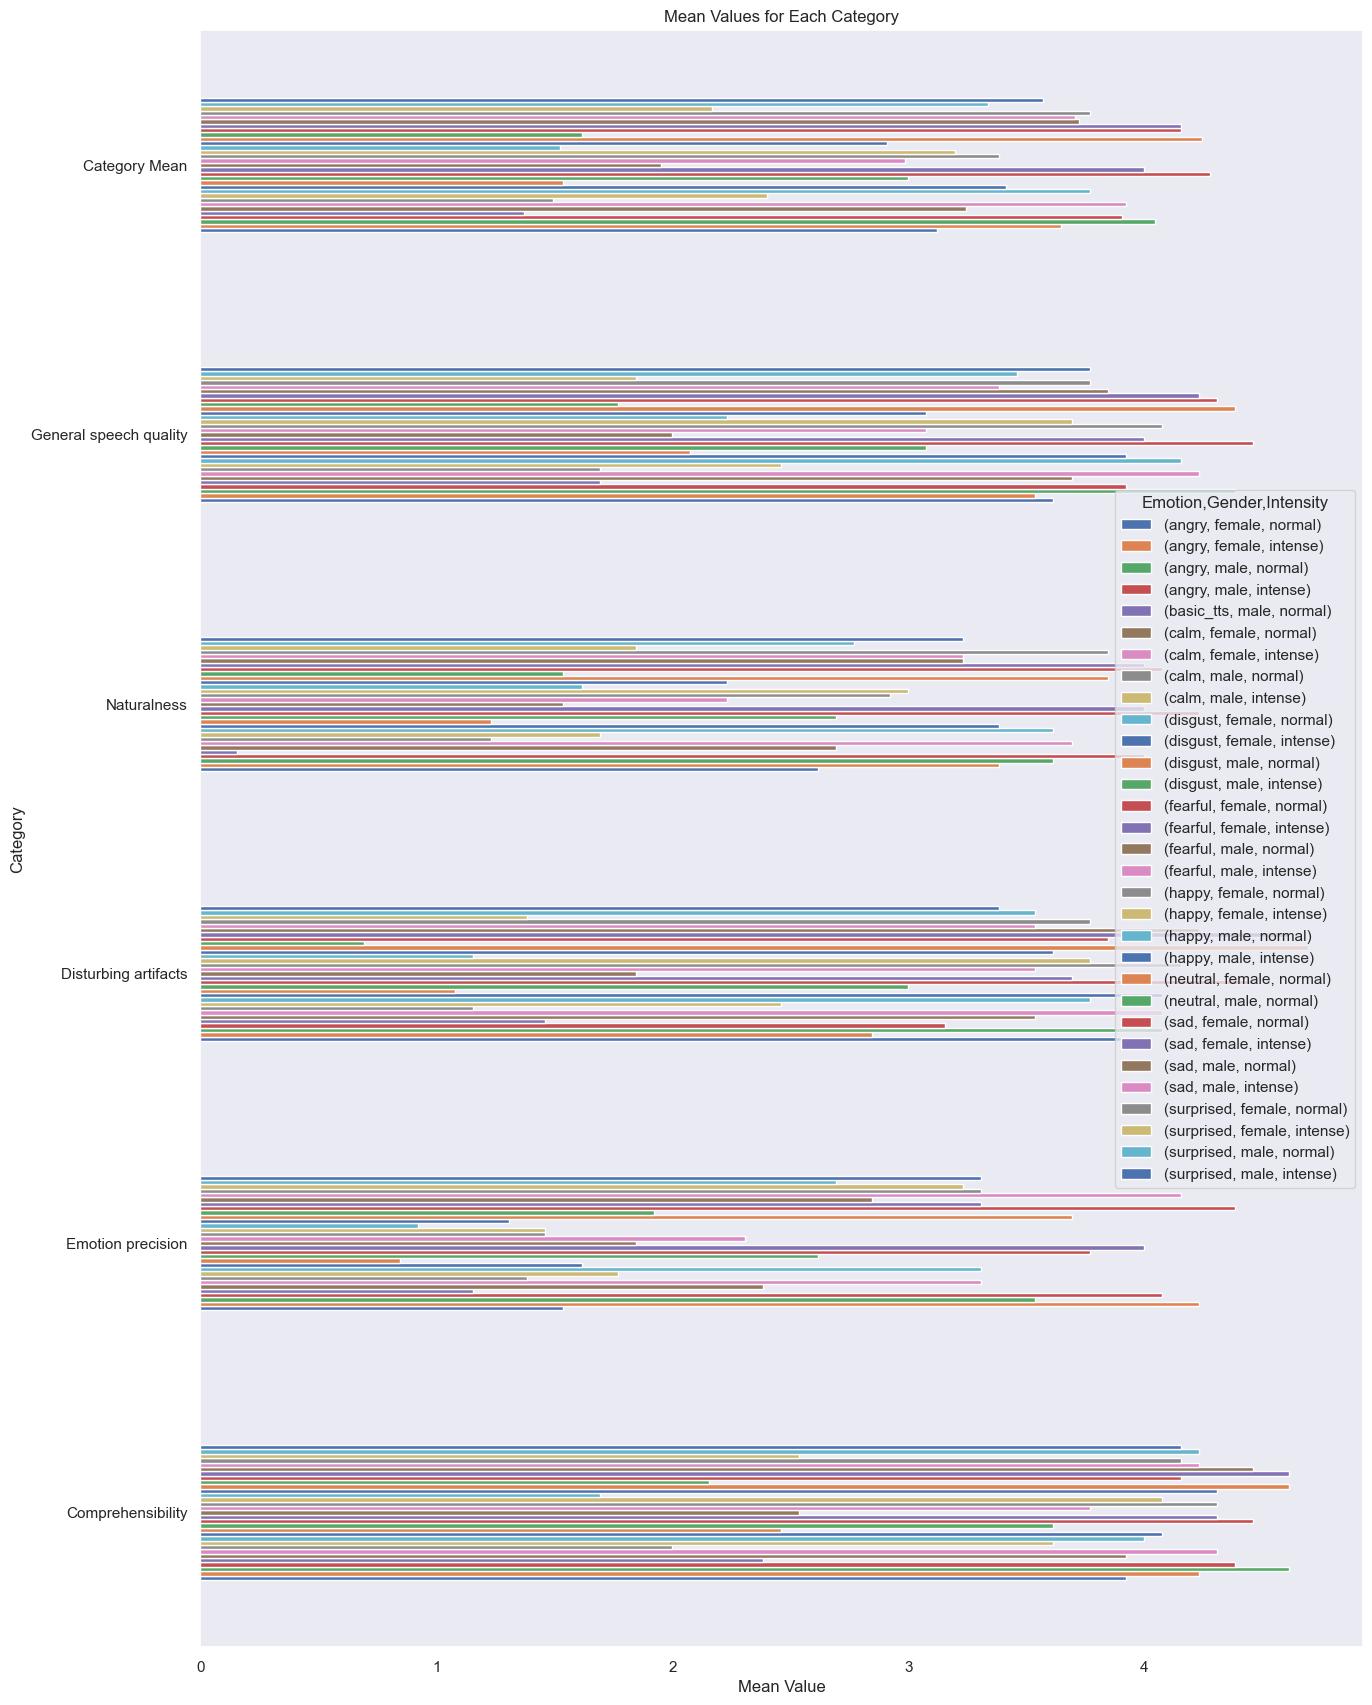

<Figure size 300x200 with 0 Axes>

In [29]:
ax = mean_df.plot(kind='barh', figsize=(15, 21))#, legend=False)
plt.title('Mean Values for Each Category')
plt.xlabel('Mean Value')
plt.ylabel('Category')
#plt.legend(loc='best')
plt.show()

fig_legend = plt.figure(figsize=(3, 2))
plt.figlegend(*ax.get_legend_handles_labels(), loc='upper left')
plt.show()

In [30]:
#result_df.info
#result_df.index
#result_df.transpose().index

In [31]:
# Get all unique categories from the DataFrame
categories = result_df.columns.get_level_values('Category').unique()

# Create a list of tuples for each category with 'Mean'
values = [(category, 'Mean') for category in categories]
errors = [(category, 'Std Dev') for category in categories]

# Create the pivot table
mean_pivot_df = result_df.pivot_table(values=values, index=['Emotion', 'Gender', 'Intensity']).reindex(order, level='Emotion')
err_pivot_df = result_df.pivot_table(values=errors, index=['Emotion', 'Gender', 'Intensity']).reindex(order, level='Emotion')

In [32]:
# Remove the 'Mean' level from the columns
mean_pivot_df.columns = mean_pivot_df.columns.droplevel(1)
err_pivot_df.columns = err_pivot_df.columns.droplevel(1)

mean_pivot_df.transpose()
err_pivot_df.transpose()

Emotion                  fearful                                 neutral  \
Gender                    female                male              female   
Intensity                intense    normal   intense    normal    normal   
Category                                                                   
Category Mean           0.995777  1.009831  1.410402  1.400998   0.95146   
Comprehensibility       0.947331   0.77625  1.165751  1.330124   0.50637   
Disturbing artifacts    1.031553  0.660225  1.126601  1.625123  0.480384   
Emotion precision            1.0  1.786703  1.652504  1.463224  1.377474   
General speech quality       1.0  0.660225  1.320451  1.080123  0.767948   
Naturalness                  1.0  1.165751  1.786703  1.506397  1.625123   

Emotion                                sad                                ...  \
Gender                      male    female                male            ...   
Intensity                 normal   intense    normal   intense    normal  ...   
Category                                                                  ...   
Category Mean             1.0889  0.973032  1.038029  1.499013  1.106129  ...   
Comprehensibility       1.068188  0.767948  0.987096  1.165751   0.77625  ...   
Disturbing artifacts     0.85485  0.767948  1.143544  1.560736  1.012739  ...   
Emotion precision        1.38212  1.250641  1.120897  1.519109  1.405119  ...   
General speech quality  1.012739  1.165751  0.751068  1.660244  0.800641  ...   
Naturalness             1.126601  0.912871  1.187542  1.589227  1.535895  ...   

Emotion                     calm surprised                                \
Gender                      male    female                male             
Intensity                 normal   intense    normal   intense    normal   
Category                                                                   
Category Mean           1.046864  1.463835  1.246699  1.324771  1.186471   
Comprehensibility            1.0  1.265924  1.068188  0.987096  1.012739   
Disturbing artifacts    1.068188  1.660244  1.480644  1.192928  0.967418   
Emotion precision        1.38675  1.300887  1.315587  1.797434  1.601282   
General speech quality  0.947331  1.519109  1.300887  1.165751  1.050031   
Naturalness              0.83205   1.57301  1.068188  1.480644  1.300887   

Emotion                  disgust                               basic_tts  
Gender                    female                male                male  
Intensity                intense    normal   intense    normal    normal  
Category                                                                  
Category Mean           1.021499  1.257008  1.380563  0.902239  1.229478  
Comprehensibility       0.954074  0.912871  1.120897  0.967418  1.502135  
Disturbing artifacts    0.862316   1.42325  1.354006  0.862316  1.560736  
Emotion precision       1.325296  1.493576  1.660244  0.987096  1.214232  
General speech quality  0.640513  0.898717  1.115164  0.862316  1.315587  
Naturalness             1.325296  1.556624  1.652504   0.83205    0.5547  

[6 rows x 27 columns]

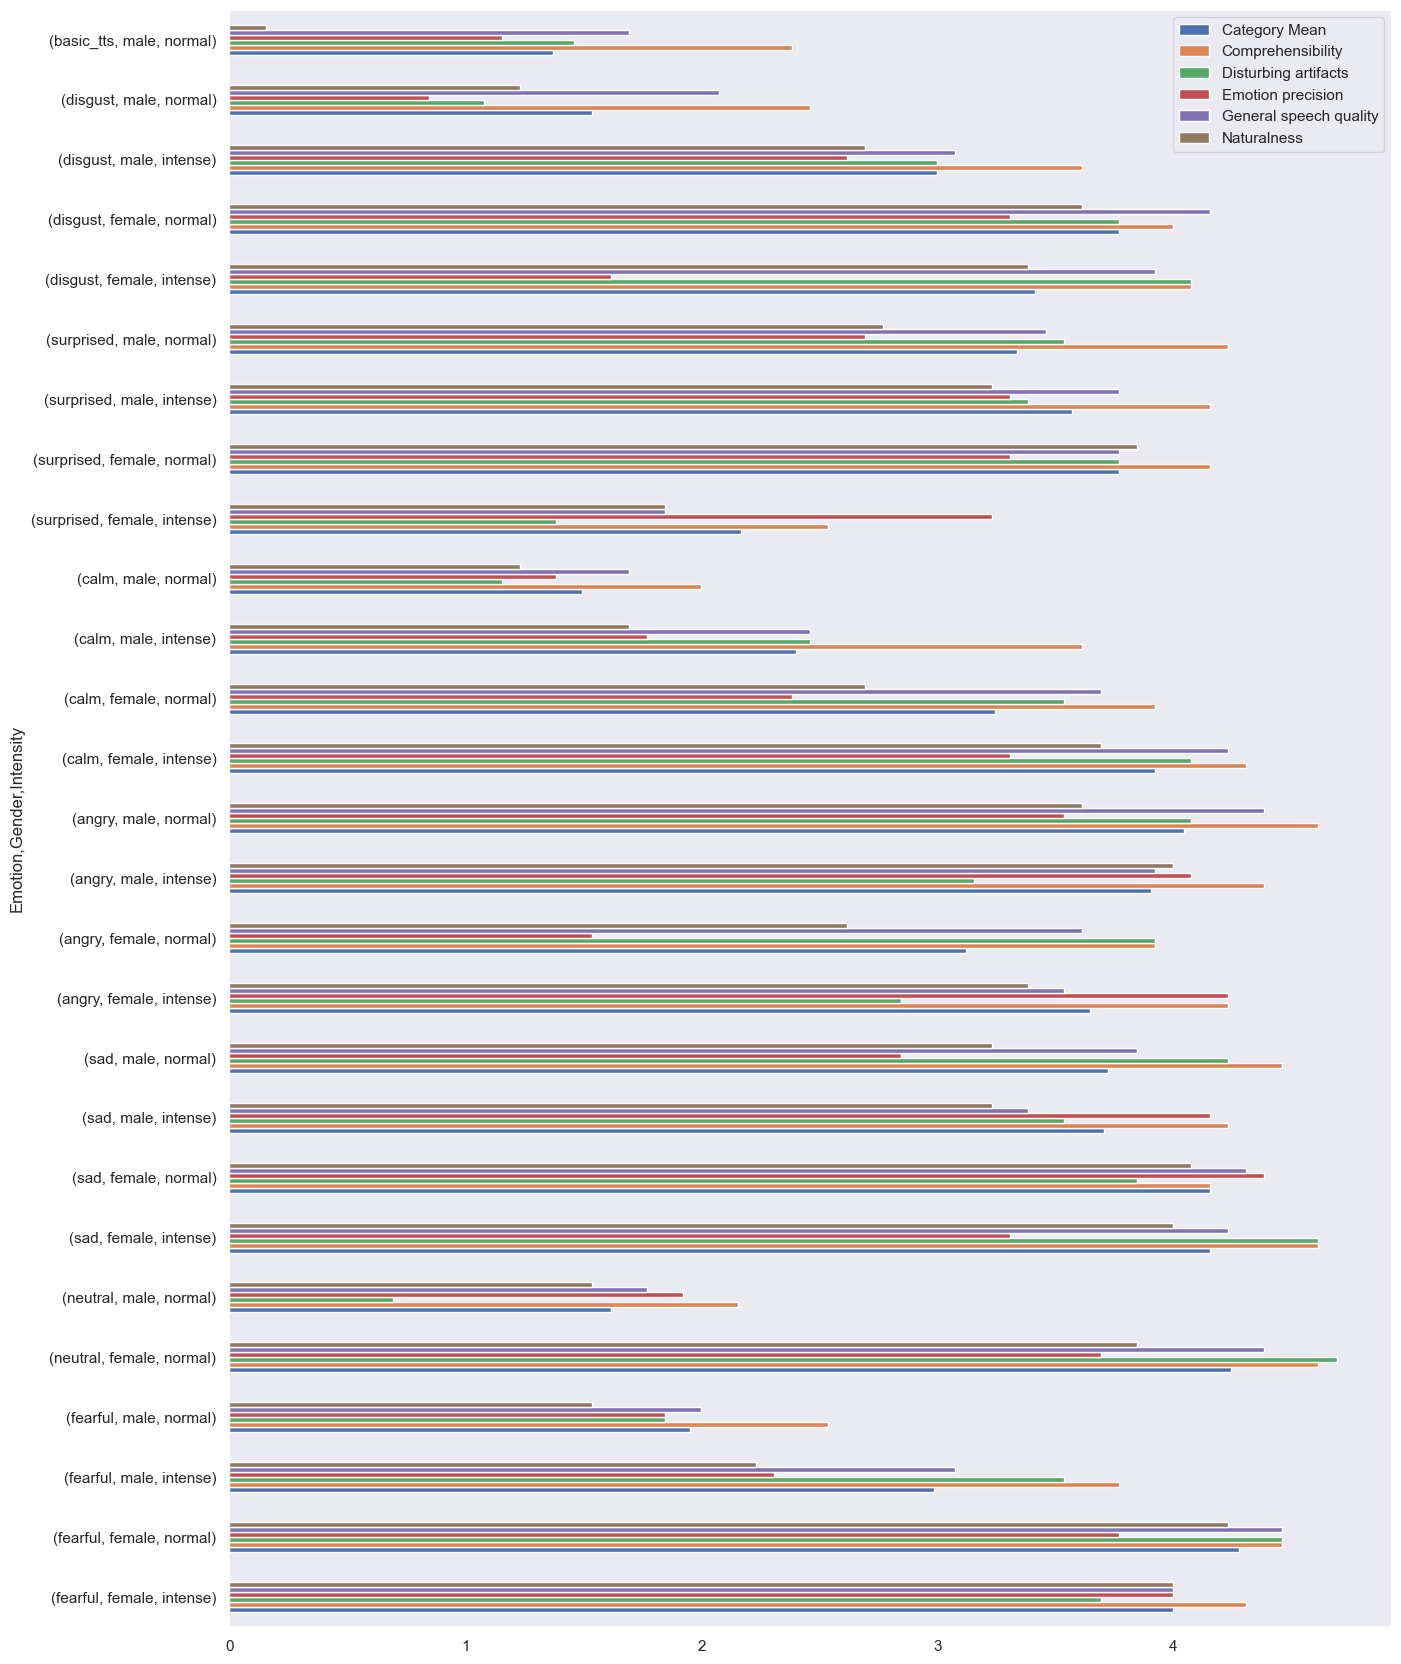

In [33]:
mean_pivot_df.plot(kind='barh', figsize=(15, 21), legend=True)
plt.legend(loc='best')
plt.show()

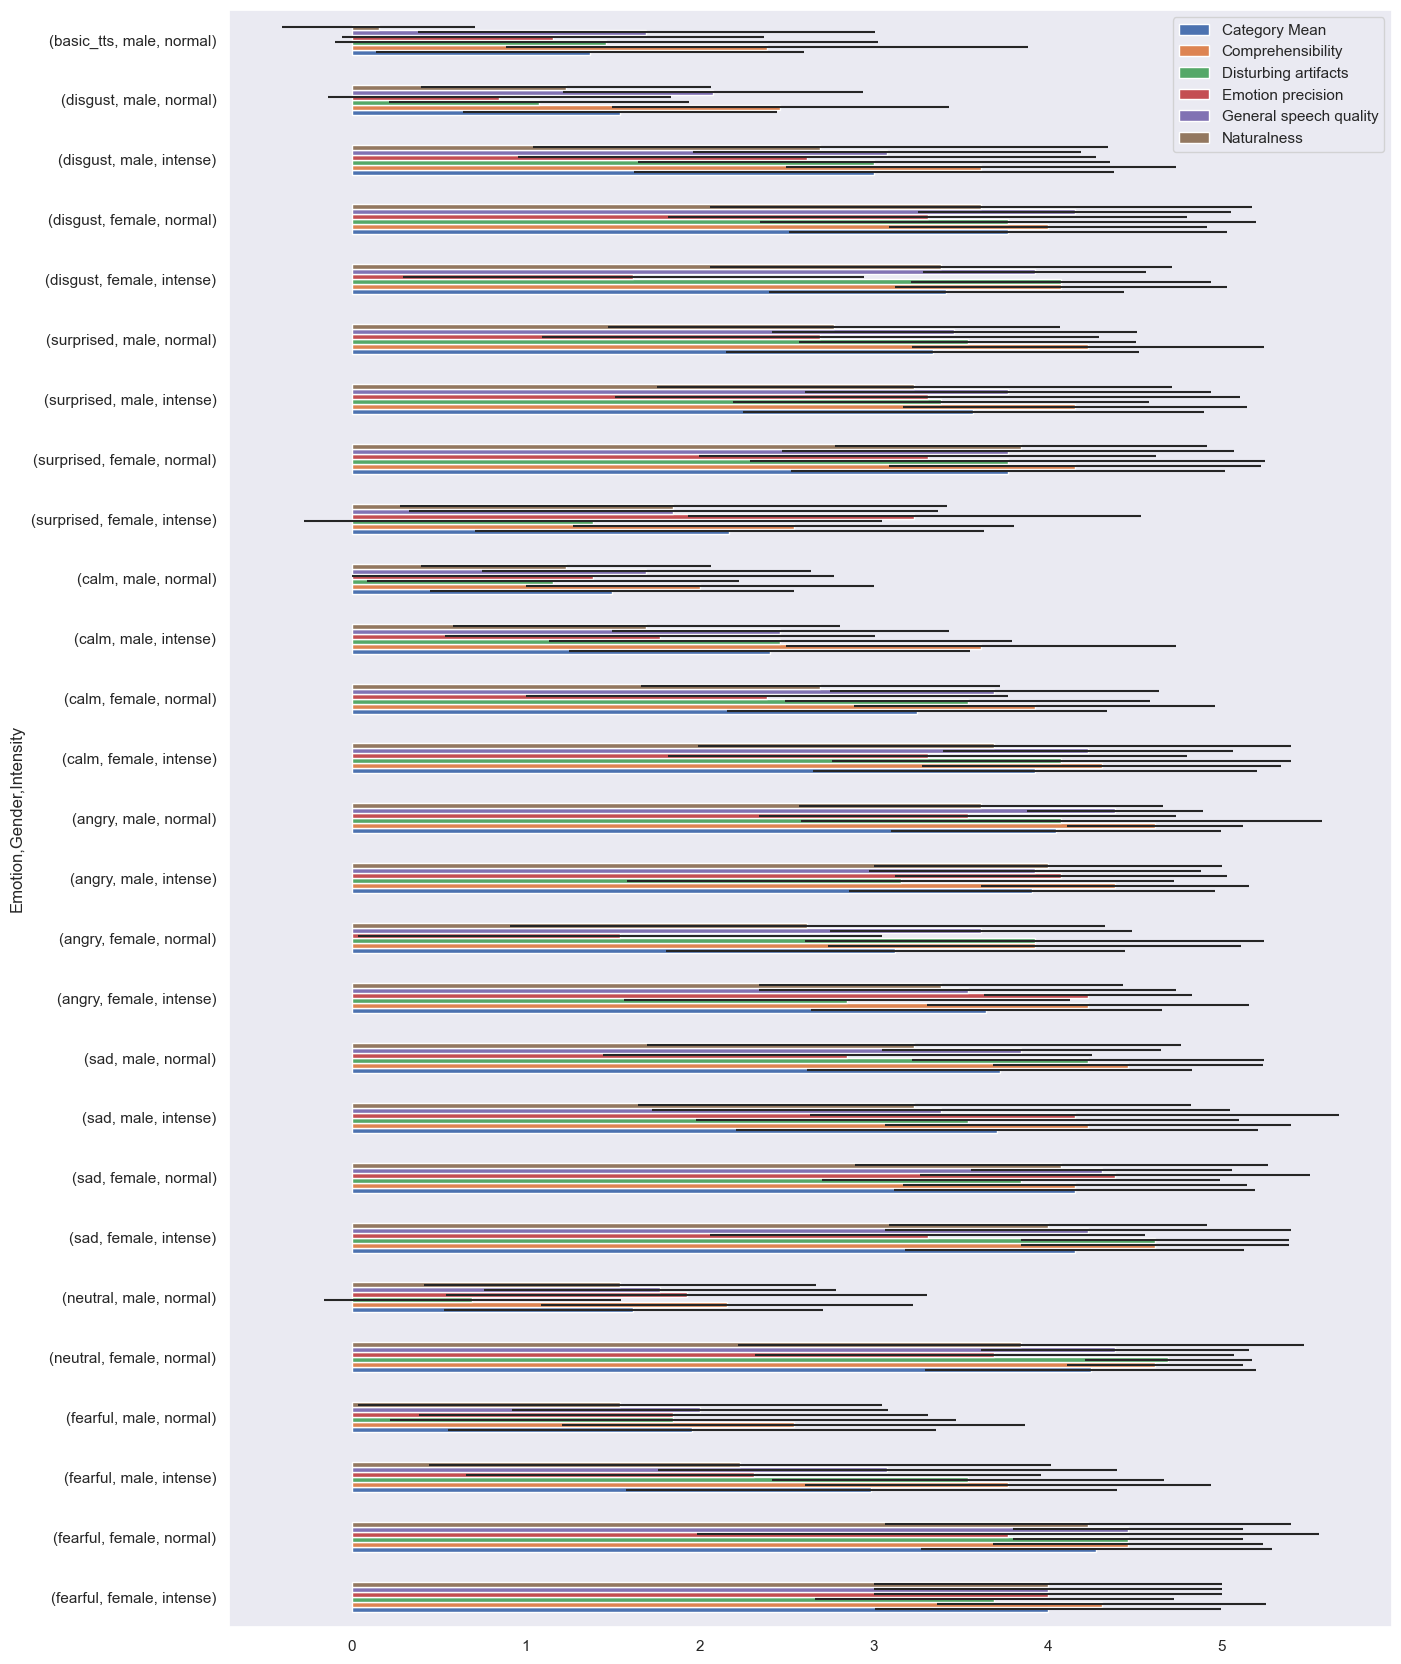

In [34]:
mean_pivot_df.plot(kind='barh', figsize=(15, 21), xerr=err_pivot_df, legend=True)
plt.legend(loc='best')
plt.show()

/var/folders/32/n1d54y1j6db26j5w_wl4tr3w0000gn/T/ipykernel_31617/3926904147.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_df = mean_pivot_df.applymap("{0:.1f}".format) + " ± " + err_pivot_df.applymap("{0:.2f}".format)


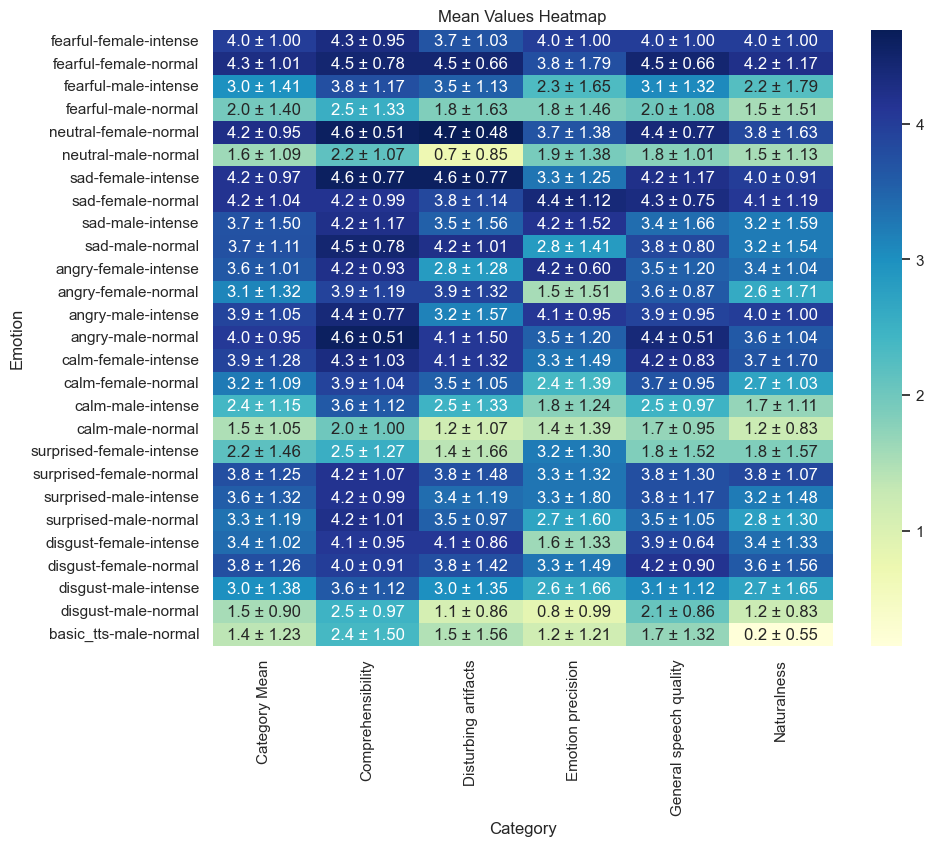

Category                    Category Mean  Comprehensibility  \
Emotion   Gender Intensity                                     
fearful   female intense         4.000000           4.307692   
                 normal          4.276923           4.461538   
          male   intense         2.984615           3.769231   
                 normal          1.953846           2.538462   
neutral   female normal          4.246154           4.615385   
          male   normal          1.615385           2.153846   
sad       female intense         4.153846           4.615385   
                 normal          4.153846           4.153846   
          male   intense         3.707692           4.230769   
                 normal          3.723077           4.461538   
angry     female intense         3.646154           4.230769   
                 normal          3.123077           3.923077   
          male   intense         3.907692           4.384615   
                 normal          4.046154           4.615385   
calm      female intense         3.923077           4.307692   
                 normal          3.246154           3.923077   
          male   intense         2.400000           3.615385   
                 normal          1.492308           2.000000   
surprised female intense         2.169231           2.538462   
                 normal          3.769231           4.153846   
          male   intense         3.569231           4.153846   
                 normal          3.338462           4.230769   
disgust   female intense         3.415385           4.076923   
                 normal          3.769231           4.000000   
          male   intense         3.000000           3.615385   
                 normal          1.538462           2.461538   
basic_tts male   normal          1.369231           2.384615   

Category                    Disturbing artifacts  Emotion precision  \
Emotion   Gender Intensity                                            
fearful   female intense                3.692308           4.000000   
                 normal                 4.461538           3.769231   
          male   intense                3.538462           2.307692   
                 normal                 1.846154           1.846154   
neutral   female normal                 4.692308           3.692308   
          male   normal                 0.692308           1.923077   
sad       female intense                4.615385           3.307692   
                 normal                 3.846154           4.384615   
          male   intense                3.538462           4.153846   
                 normal                 4.230769           2.846154   
angry     female intense                2.846154           4.230769   
                 normal                 3.923077           1.538462   
          male   intense                3.153846           4.076923   
                 normal                 4.076923           3.538462   
calm      female intense                4.076923           3.307692   
                 normal                 3.538462           2.384615   
          male   intense                2.461538           1.769231   
                 normal                 1.153846           1.384615   
surprised female intense                1.384615           3.230769   
                 normal                 3.769231           3.307692   
          male   intense                3.384615           3.307692   
                 normal                 3.538462           2.692308   
disgust   female intense                4.076923           1.615385   
                 normal                 3.769231           3.307692   
          male   intense                3.000000           2.615385   
                 normal                 1.076923           0.846154   
basic_tts male   normal                 1.461538           1.153846   

Category                    General speech quality  Naturalness  
Emotion   Gender 

In [35]:
plt.figure(figsize=(10, 8))

mean_pivot_df = mean_pivot_df.apply(pd.to_numeric, errors='coerce')
#sns.heatmap(mean_pivot_df, cmap="YlGnBu", annot=True, fmt=".2f", cbar=True)
annot_df = mean_pivot_df.applymap("{0:.1f}".format) + " ± " + err_pivot_df.applymap("{0:.2f}".format)
sns.heatmap(mean_pivot_df, cmap="YlGnBu", annot=annot_df, fmt="", cbar=True)
plt.title("Mean Values Heatmap")
plt.xlabel("Category")
plt.ylabel("Emotion")
plt.show()
mean_pivot_df